# 21BAI1133 - Mukundh J

# Logistic Regression - ML Lab assignment 5

# Q1.
Design a binary classifier for classifying the following emails as spam (1) or ham (0). Use email.csv for training.

    • Print all the parameter values learnt after training

    • Show the accuracy on the test set.

In [1]:
import pandas as pd

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('email.csv')

In [4]:
df.head()

,x0,x1,x2,x3,x4,x5,class
0,1,1,1,0,1,1,1
1,1,0,0,1,1,0,0
2,1,0,1,1,0,0,1
3,1,1,0,0,1,0,0
4,1,1,0,1,0,1,1


In [5]:
df.isnull().sum()

x0       0
x1       0
x2       0
x3       0
x4       0
x5       0
class    0
dtype: int64

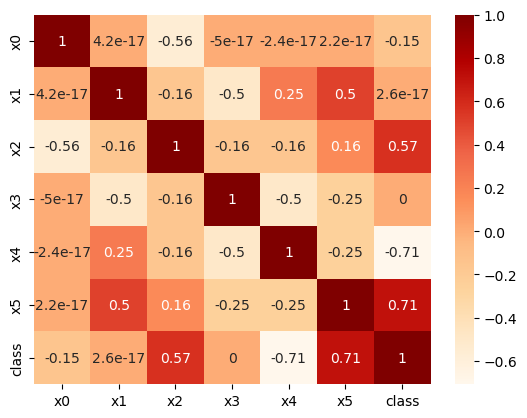

In [6]:
corre = df.corr()
dataplot = sns.heatmap(corre, cmap="OrRd", annot=True)

In [7]:
x=df.iloc[:,:-1]

In [8]:
y=df['class']

In [9]:
x['intercept']=1

In [10]:
x

,x0,x1,x2,x3,x4,x5,intercept
0,1,1,1,0,1,1,1
1,1,0,0,1,1,0,1
2,1,0,1,1,0,0,1
3,1,1,0,0,1,0,1
4,1,1,0,1,0,1,1
5,0,1,1,1,1,0,1
6,1,1,1,0,1,1,1
7,1,0,0,1,1,0,1
8,1,0,1,1,0,0,1
9,1,1,0,0,1,0,1


In [11]:
x.columns

Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'intercept'], dtype='object')

In [12]:
theta=np.array([0,0,0,0,0,0,0])
x=np.array(x)
y=np.array(y)

In [13]:
def grad(x,y,theta,epochs=1200,alpha=0.001):
    for i in range(epochs):
        f=x.dot(theta)
        h=1/(1+np.exp(-f))
        loss=h-y
        grad=x.T.dot(loss)/len(y)
        theta=theta-alpha*grad
    return theta

In [14]:
newt=grad(x,y,theta)
newt

array([-0.027621  ,  0.00135203,  0.15955516,  0.0014069 , -0.18896578,
        0.1920723 ,  0.00316211])

In [15]:
sample=np.array([[0,0,1,0,0,0,1],[1,1,1,1,0,1,1],[1,0,1,1,0,0,1],[0,1,0,1,0,0,1],[1,0,1,0,0,1,0],[1,0,0,0,1,1,0],[0,0,1,0,1,1,0],[0,0,0,0,0,1,0]])

In [16]:
sample=pd.DataFrame(sample)

In [17]:
sample.columns=['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'class']

In [18]:
sample['intercept']=1

In [19]:
sample

,x0,x1,x2,x3,x4,x5,class,intercept
0,0,0,1,0,0,0,1,1
1,1,1,1,1,0,1,1,1
2,1,0,1,1,0,0,1,1
3,0,1,0,1,0,0,1,1
4,1,0,1,0,0,1,0,1
5,1,0,0,0,1,1,0,1
6,0,0,1,0,1,1,0,1
7,0,0,0,0,0,1,0,1


In [20]:
x_test=sample.drop('class',axis=1)

In [21]:
y_test=sample['class']

In [22]:
x_test=np.array(x_test)
y_test=np.array(y_test)

In [23]:
y_test

array([1, 1, 1, 1, 0, 0, 0, 0])

In [24]:
x_test

array([[0, 0, 1, 0, 0, 0, 1],
       [1, 1, 1, 1, 0, 1, 1],
       [1, 0, 1, 1, 0, 0, 1],
       [0, 1, 0, 1, 0, 0, 1],
       [1, 0, 1, 0, 0, 1, 1],
       [1, 0, 0, 0, 1, 1, 1],
       [0, 0, 1, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 1]])

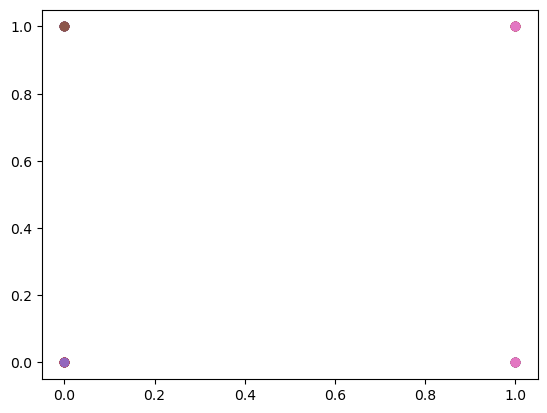

In [25]:
plt.scatter(x_test[:,0],y_test)
plt.scatter(x_test[:,1],y_test)
plt.scatter(x_test[:,2],y_test)
plt.scatter(x_test[:,3],y_test)
plt.scatter(x_test[:,4],y_test)
plt.scatter(x_test[:,5],y_test)
plt.scatter(x_test[:,6],y_test)

In [26]:
y_pred=1/(1+np.exp(-newt))

In [27]:
y_pred

array([0.49309519, 0.50033801, 0.53980438, 0.50035173, 0.45289863,
       0.54787099, 0.50079053])

In [28]:
y_pred[y_pred<0.5]=0
y_pred

array([0.        , 0.50033801, 0.53980438, 0.50035173, 0.        ,
       0.54787099, 0.50079053])

In [29]:
y_pred[y_pred>=0.5]=1

In [30]:
y_pred.astype('int')

array([0, 1, 1, 1, 0, 1, 1])

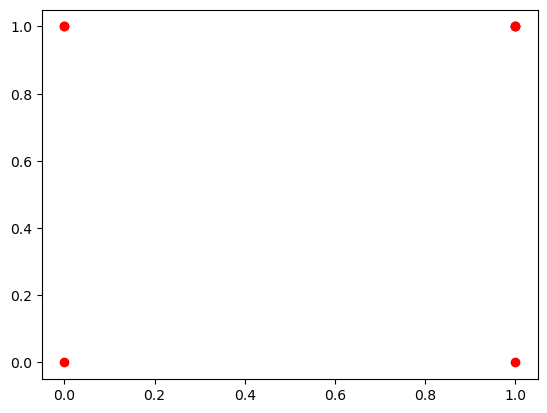

In [31]:
plt.scatter(x_test[:-1,0],y_pred,color='red')

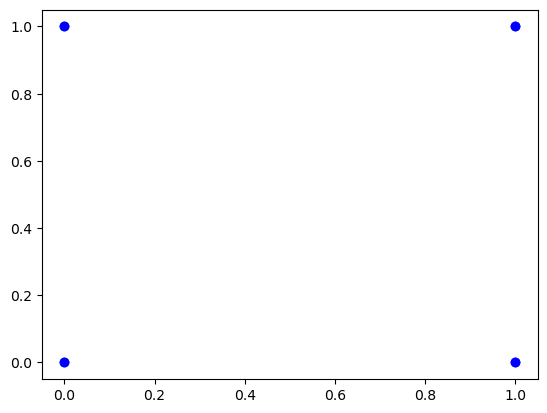

In [32]:
plt.scatter(x_test[:,0],y_test,color='blue')

/Users/mukundhjayapal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


<AxesSubplot:>

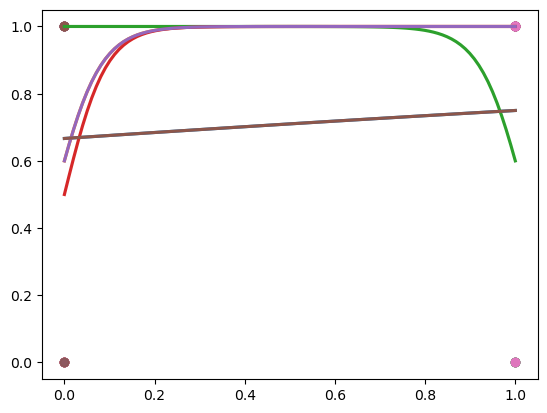

In [33]:
sns.regplot(x=x_test[:-1,0], y=y_pred, data=df, logistic=True, ci=None)
sns.regplot(x=x_test[:-1,1], y=y_pred, data=df, logistic=True, ci=None)
sns.regplot(x=x_test[:-1,2], y=y_pred, data=df, logistic=True, ci=None)
sns.regplot(x=x_test[:-1,3], y=y_pred, data=df, logistic=True, ci=None)
sns.regplot(x=x_test[:-1,4], y=y_pred, data=df, logistic=True, ci=None)
sns.regplot(x=x_test[:-1,5], y=y_pred, data=df, logistic=True, ci=None)
sns.regplot(x=x_test[:-1,6], y=y_pred, data=df, logistic=True, ci=None)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
y_test=y_test[:-1]

In [36]:
accuracy=accuracy_score(y_test,y_pred)

In [37]:
accuracy

0.5714285714285714

/Users/mukundhjayapal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


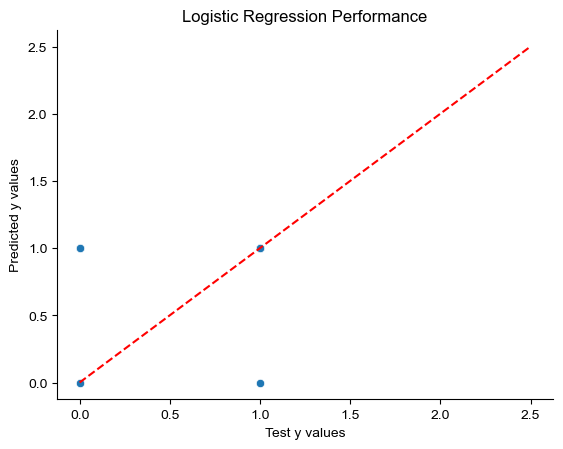

In [38]:
sns.scatterplot(x=y_test, y=y_pred)
sns.lineplot([0, 2.5], [0, 2.5], color='red', linestyle='--')
sns.set_style('whitegrid')
sns.despine()
plt.xlabel('Test y values')
plt.ylabel('Predicted y values')
plt.title('Logistic Regression Performance')
plt.show()

# Q2. 
Use appropriate Scikit Library function to apply logistic regression on the same dataset and compare the results with your implementation.

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0)

In [41]:
logreg.fit(X_train, y_train)
logreg.coef_

array([[-4.10627485e-01,  2.26031413e-02,  9.71293784e-01,
         1.58524672e-01, -1.14713897e+00,  1.18344925e+00,
        -4.25434595e-06]])

In [42]:
y_pred = logreg.predict(X_test)

In [43]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.75

/Users/mukundhjayapal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


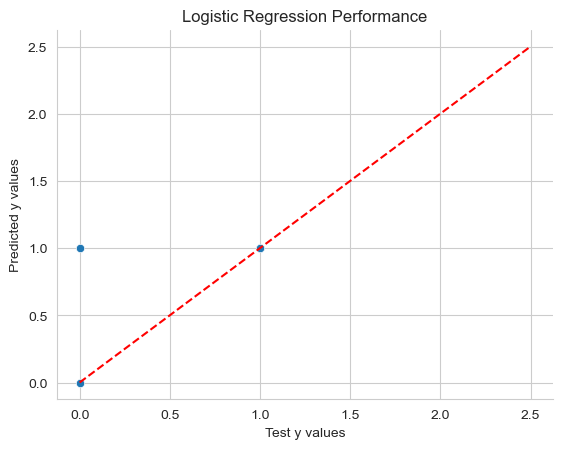

In [44]:
sns.scatterplot(x=y_test, y=y_pred)
sns.lineplot([0, 2.5], [0, 2.5], color='red', linestyle='--')
sns.set_style('whitegrid')
sns.despine()
plt.xlabel('Test y values')
plt.ylabel('Predicted y values')
plt.title('Logistic Regression Performance')
plt.show()

# Q3.
Also use logistic regression model to predict the risk of having heart disease using the given dataset (heart.csv). 
You need to show complete pre-processing steps (identifying null or missing values, normalization, etc.)

In [45]:
df = pd.read_csv('heart.csv')
df = df.dropna(axis=1)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [46]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [47]:
X = df.iloc[:,:-1]
y = df['target']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<AxesSubplot:xlabel='age', ylabel='target'>

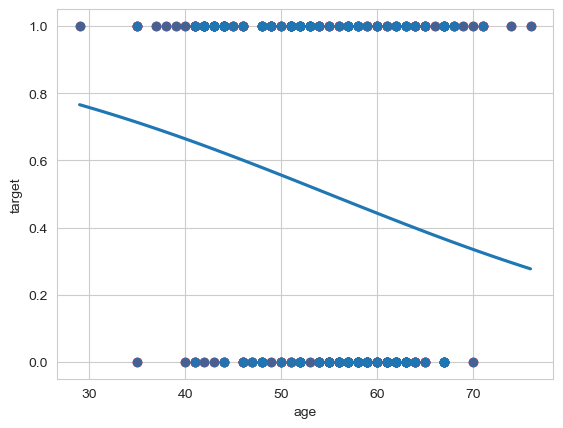

In [49]:
plt.scatter(X_test['age'],y_test,color='red')
sns.regplot(x=X_test['age'], y=y_test, data=df, logistic=True, ci=None)

In [50]:
from sklearn.linear_model import LogisticRegression
log2 = LogisticRegression(random_state=0, max_iter=10000)

In [51]:
log2.fit(X_train, y_train)
log2.coef_

array([[ 1.28721356e-03, -1.72173055e+00,  8.44637344e-01,
        -1.79984341e-02, -8.86194623e-03, -1.98207631e-01,
         2.60157297e-01,  2.92459754e-02, -8.26111154e-01,
        -6.79676912e-01,  5.34547595e-01, -8.06832405e-01,
        -1.06608208e+00]])

In [52]:
y_pred = log2.predict(X_test)

In [53]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7951219512195122

/Users/mukundhjayapal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


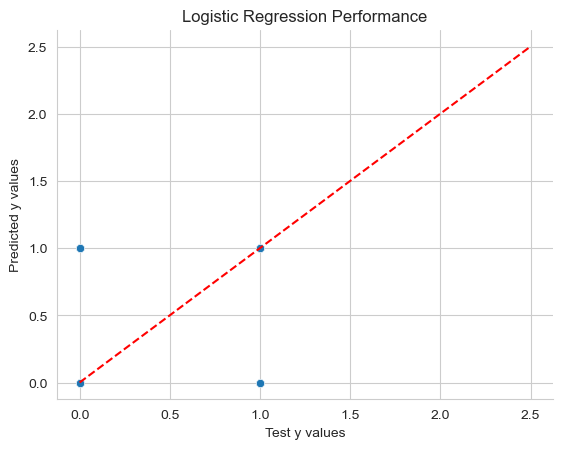

In [54]:
sns.scatterplot(x=y_test, y=y_pred)
sns.lineplot([0, 2.5], [0, 2.5], color='red', linestyle='--')
sns.set_style('whitegrid')
sns.despine()
plt.xlabel('Test y values')
plt.ylabel('Predicted y values')
plt.title('Logistic Regression Performance')
plt.show()